# Boiler Aufheizkurve

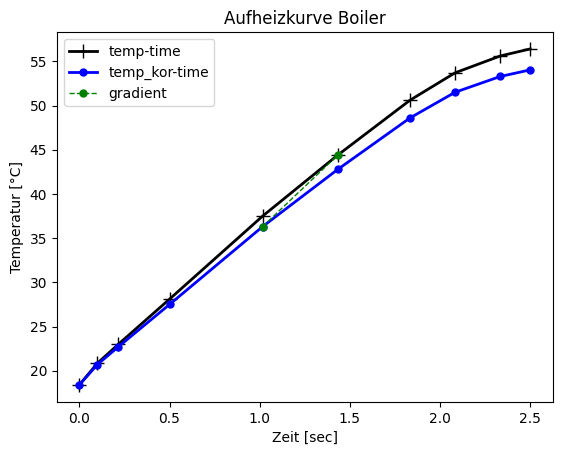

In [41]:
from matplotlib import pyplot as plt
import numpy as np

time_meas_s   = np.array([0,6,13,30,61,86,110,125,140,150])*60.
temp_meas_deg = np.array([18.4,20.85,23.0,28.1,37.5,44.4,50.6,53.7,55.6,56.4])

P = 2000

dtemp_vec = np.empty(shape=(time_meas_s.size, 1), dtype=float)
dtemp_kor_vec = np.empty(shape=(time_meas_s.size, 1), dtype=float)
temp_kor_vec= np.empty(shape=(time_meas_s.size, 1), dtype=float)

temp_kor_vec[0] = 18.4

for i in range(1,time_meas_s.size):
  delta_temp = temp_meas_deg[i]-temp_meas_deg[i-1]
  delta_time = time_meas_s[i]-time_meas_s[i-1]
  dtemp_vec[i] = delta_temp/delta_time


  # Mischtemperatur mit 5 l mit 18.4 °C
  temp_kor_vec[i] = (75.*temp_meas_deg[i]+5*18.5)/80

  delta_kor_temp   = temp_meas_deg[i]-temp_kor_vec[i-1]
  dtemp_kor_vec[i] = delta_kor_temp/delta_time

  # print(f"dtemp_vec[{i}] {dtemp_vec[i]}, dtemp_kor_vec[{i}] {dtemp_kor_vec[i]}, quot = {dtemp_kor_vec[i]/dtemp_vec[i]}")

dtemp_vec[0] = dtemp_vec[1]  
dtemp_kor_vec[0] = dtemp_kor_vec[1] 

# a = np.empty(shape=(25, 2), dtype=int)
# for x in range(1, 6):
#     for y in range(1, 6):
#         index = (x-1)*5+(y-1)
#         a[index] = x, y

time_grad_vec = np.empty(shape=(2, 1), dtype=float)
temp_grad_vec = np.empty(shape=(2, 1), dtype=float)

time_grad_vec[0] = time_meas_s[4]
time_grad_vec[1] = time_meas_s[5]
temp_grad_vec[0] = temp_kor_vec[4]
temp_grad_vec[1] = temp_meas_deg[5]

plt.plot(time_meas_s/60./60.,temp_meas_deg,color='#000000',linestyle='-',linewidth=2,marker='+',markersize=10,label='temp-time')
plt.plot(time_meas_s/60./60.,temp_kor_vec,color='b',linestyle='-',linewidth=2,marker='o',markersize=5,label='temp_kor-time')
plt.plot(time_grad_vec/60./60.,temp_grad_vec,color='g',linestyle='--',linewidth=1,marker='o',markersize=5,label='gradient')

plt.title('Aufheizkurve Boiler')
plt.xlabel('Zeit [sec]')
plt.ylabel('Temperatur [°C]')
plt.legend()
plt.show()

In [42]:
y = np.empty(shape=(time_meas_s.size, 1), dtype=float)
A = np.empty(shape=(time_meas_s.size, 2), dtype=float)
x = np.empty(shape=(2, 1), dtype=float)

for i in range(0,time_meas_s.size):
  y[i] = dtemp_kor_vec[i]
  A[i] = -temp_meas_deg[i], P

B = np.empty(shape=(2,time_meas_s.size), dtype=float)
B = A.transpose
print(B)
#AA = np.matmul(B , A)

x = np.linalg.lstsq(A, y, rcond=0.001)

a = x[0]
b = x[1]
print(b)


<built-in method transpose of numpy.ndarray object at 0x000002307FE630F0>
[2.25386276e-06]
